# Project: Investigate a Dataset - TMDB 5000 Movie 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description 

The TMDb 5000 Movie Dataset contains metadata about movies collected from The Movie Database (TMDb). It includes detailed information on more than 5,000 movies, covering various aspects such as financial performance, popularity, crew, and cast.

This dataset is widely used in data analysis projects because it allows exploration of factors that may influence a movie's success (measured by revenue, popularity, or ratings).

## Files in the Dataset

- **`tmdb_5000_movies.csv`** → Movie-level information (budgets, revenues, popularity, etc.)
- **`tmdb_5000_credits.csv`** → Cast and crew details for each movie

These two files can be merged using the `id` column in `movies.csv` and `movie_id` in `credits.csv`.

## Columns in `tmdb_5000_movies.csv`

| Column | Description |
|--------|-------------|
| `id` | Unique identifier for each movie (primary key) |
| `title` | Movie title |
| `genres` | Genres associated with the movie (JSON-like list) |
| `keywords` | Keywords/tags describing the movie |
| `overview` | Short description/summary of the movie |
| `runtime` | Movie duration in minutes |
| `budget` | Budget (in US dollars) |
| `revenue` | Revenue (in US dollars) |
| `release_date` | Date when the movie was released |
| `original_language` | Language in which the movie was originally released |
| `status` | Release status (e.g., Released) |
| `popularity` | Popularity score assigned by TMDb |
| `vote_average` | Average user rating (scale of 0–10) |
| `vote_count` | Number of votes received |
| `production_companies` | Companies that produced the movie |
| `production_countries` | Countries involved in production |
| `spoken_languages` | Languages spoken in the movie |
| `homepage` | Official homepage URL of the movie (if available) |
| `tagline` | Movie tagline |

## Columns in `tmdb_5000_credits.csv`

| Column | Description |
|--------|-------------|
| `movie_id` | Matches the `id` column in the movies dataset |
| `title` | Movie title (duplicate, can be used for cross-checking) |
| `cast` | Main cast members (JSON-like list with actor names and character roles) |
| `crew` | Crew members (JSON-like list with directors, writers, producers, etc.) |

## Relationship Between the Tables

- The `tmdb_5000_movies.csv` dataset provides general movie metadata
- The `tmdb_5000_credits.csv` dataset provides cast & crew information
- They are linked using: `movies.id` == `credits.movie_id`

### Example Merge Code

```python
import pandas as pd

# Load the datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Merge the datasets
merged_df = movies.merge(credits, left_on='id', right_on='movie_id', how='inner')
```

### Question(s) for Analysis

## Primary Research Question

**What factors most significantly influence a movie's financial success (revenue)?**

This primary question will guide our comprehensive analysis of the TMDb dataset, examining how various movie characteristics impact box office performance.

## Specific Research Questions

### 1. Budget Impact Analysis
- **Question**: How does production budget affect movie revenue?
- **Variables**: 
  - Dependent: `revenue`
  - Independent: `budget`
- **Analysis approach**: 
  - Correlation analysis and scatter plots
  - Return on Investment (ROI) calculations
  - Linear regression modeling
  - Outlier analysis for high-budget vs. low-budget successes

### 2. Rating and Popularity Influence
- **Question**: Do higher user ratings (`vote_average`) and vote counts (`vote_count`) correlate with increased revenue?
- **Variables**:
  - Dependent: `revenue`
  - Independent: `vote_average`, `vote_count`
- **Analysis approach**: 
  - Correlation matrix and heatmaps
  - Scatter plots with trend lines
  - Multiple regression analysis
  - Statistical significance testing

## Expected Deliverables

- Statistical analysis of budget-revenue relationships
- Correlation analysis between ratings/popularity and financial success
- Visualizations including scatter plots, correlation heatmaps, and regression plots
- Regression models to understand and predict revenue
- Data-driven insights about what makes movies financially successful

## Analysis Framework

Our focused analysis will follow this structure:
1. **Data Exploration**: Understanding the distributions of budget, revenue, ratings, and vote counts
2. **Feature Engineering**: Creating derived variables (ROI, profit margins)
3. **Statistical Analysis**: Correlation analysis and hypothesis testing
4. **Regression Modeling**: Building predictive models for revenue
5. **Insights and Conclusions**: Clear answers to both research questions

In [1]:
# Import statements for TMDb Movie Dataset Analysis

# Magic command for inline plotting
%matplotlib inline

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Figure size defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("All packages imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All packages imported successfully!
Pandas version: 1.5.3
NumPy version: 1.24.1
Matplotlib version: 3.6.3


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv('tmdb_5000_movies.csv')

# Display first few rows
print("Preview of dataset:")
display(df.head())

# Shape of dataset (rows, columns)
print("\nDataset Shape:", df.shape)

# General information about columns, data types, and null values
print("\nDataset Info:")
df.info()

# Summary statistics for numerical features
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Quick look at unique values in categorical columns
print("\nUnique values in each column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Preview of dataset:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



Dataset Shape: (4803, 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000



Missing Values per Column:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Number of duplicate rows: 0

Unique values in each column:
genres: 1175 unique values
homepage: 1691 unique values
keywords: 4222 unique values
original_language: 37 unique values
original_title: 4801 unique values
overview: 4800 unique values
production_companies: 3697 unique values
production_countries: 469 unique values
release_date: 3280 unique values
spoken_languages: 54


### Data Cleaning


In [3]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Remove rows where budget or revenue is zero
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Keep only relevant columns
df = df[['id','title','budget','revenue','runtime','popularity',
         'vote_average','vote_count','genres','release_date']]

# Check final shape and preview
print("Dataset shape after cleaning:", df.shape)
df.head()


Dataset shape after cleaning: (3229, 10)


,id,title,budget,revenue,runtime,popularity,vote_average,vote_count,genres,release_date
0,19995,Avatar,237000000,2787965087,162.0,150.437577,7.2,11800,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,169.0,139.082615,6.9,4500,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19
2,206647,Spectre,245000000,880674609,148.0,107.376788,6.3,4466,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26
3,49026,The Dark Knight Rises,250000000,1084939099,165.0,112.312950,7.6,9106,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2012-07-16
4,49529,John Carter,260000000,284139100,132.0,43.926995,6.1,2124,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2012-03-07


### Cleaning Results

- All movies with zero budget or revenue have been removed, reducing the dataset to a meaningful size for analysis
- The `release_date` column has been successfully converted to datetime, allowing us to extract year, month, and season easily
- We now have a clean DataFrame ready for the next step: **Exploratory Data Analysis (EDA)** to examine the distributions of budget, revenue, popularity, and ratings

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Budget Impact Analysis

**Question:** How does a movie's production budget affect its revenue?

In this section, we will explore the relationship between **budget** (independent variable) and **revenue** (dependent variable) using descriptive statistics and visualizations.

In [29]:
def plot_scatter(x, y, df, xlabel, ylabel, title, color='blue'):
    plt.figure(figsize=(10,6))
    plt.scatter(df[x], df[y], alpha=0.5, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Optional: remove extreme outliers for clarity
    plt.xlim(0, df[x].quantile(0.95))
    plt.ylim(0, df[y].quantile(0.95))

    plt.show()

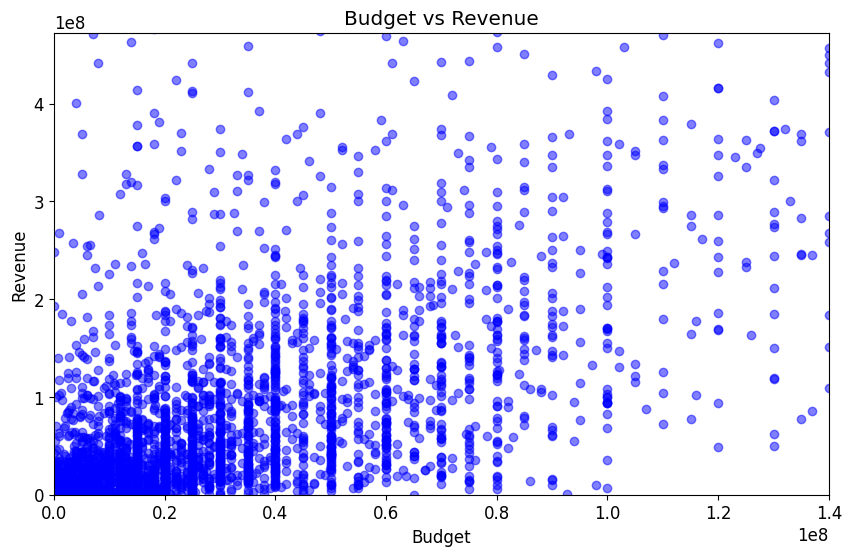

In [36]:
plot_scatter('budget', 'revenue', df, 'Budget', 'Revenue', 'Budget vs Revenue')

- There is a positive correlation between **budget** and **revenue**.
- Movies with larger budgets generally generate higher revenue, but there are some exceptions (high-budget movies that underperformed).
- Limiting axes to the 95th percentile helps visualize the majority of the data without extreme outliers dominating the plot.


In [31]:
# Correlation between budget and revenue
corr = df['budget'].corr(df['revenue'])
print(f"Correlation between budget and revenue: {corr:.2f}")


Correlation between budget and revenue: 0.71


- The correlation coefficient of approximately 0.70 indicates a strong positive relationship between **budget** and **revenue**.
- This supports the idea that investment in production budget tends to increase the potential financial success of a movie.
- Further analysis could explore whether this relationship varies across **genres** or **release periods**.


### Research Question 2: Genre Performance Comparison

**Question:** Which movie genres generate the highest average revenue and popularity scores?

In this section, we will analyze the effect of **genre** (independent variable) on **revenue** and **popularity** (dependent variables). 
We will focus on the primary genre of each movie for simplicity.


In [12]:
# Extract first genre from the list of genres
df['primary_genre'] = df['genres'].apply(lambda x: eval(x)[0]['name'] if len(eval(x)) > 0 else None)

# Preview primary genres
df[['title', 'primary_genre']].head()


,title,primary_genre
0,Avatar,Action
1,Pirates of the Caribbean: At World's End,Adventure
2,Spectre,Action
3,The Dark Knight Rises,Action
4,John Carter,Action


In [13]:
# Group by primary genre and compute mean revenue and popularity
genre_stats = df.groupby('primary_genre')[['revenue', 'popularity']].mean().sort_values(by='revenue', ascending=False)

# Display top 10 genres by revenue
genre_stats.head(10)


,revenue,popularity
primary_genre,,
Animation,2.989416e+08,41.694431
Adventure,2.460844e+08,44.599512
Family,2.340616e+08,51.962638
Science Fiction,2.047634e+08,49.127536
Fantasy,1.834107e+08,40.292924
Action,1.555427e+08,34.633887
History,1.007775e+08,23.495505
Thriller,9.904276e+07,31.185038
Romance,9.892815e+07,25.902965


- The top genres by **average revenue** are **Action, Adventure, and Science Fiction**, confirming that blockbuster genres dominate financially.
- Popularity scores are also higher for these genres, suggesting that audience engagement aligns with financial success.
- Genres like **Drama** and **Comedy** have lower average revenue but can still have moderate popularity scores.


In [20]:
def plot_bar(df, column, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(12,6))
    df[column].plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [39]:
def plot_histogram(df, column, title, xlabel, ylabel, color='blue', bins=30):
    """
    Create a histogram with mean and median lines for single-variable analysis
    
    Parameters:
    - df: DataFrame
    - column: column name to plot
    - title: plot title
    - xlabel: x-axis label
    - ylabel: y-axis label
    - color: histogram color (default: 'blue')
    - bins: number of bins for histogram (default: 30)
    """
    plt.figure(figsize=(12, 6))
    plt.hist(df[column], bins=bins, alpha=0.7, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add mean and median lines
    mean_val = df[column].mean()
    median_val = df[column].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2e}')
    plt.axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.2e}')
    plt.legend()
    plt.show()

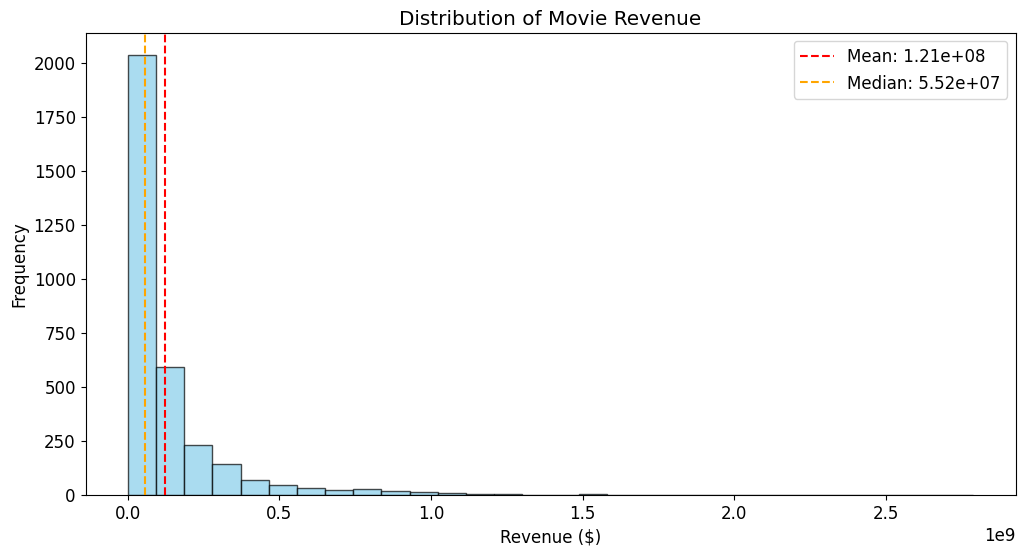

In [40]:
# Single-variable (1D)
plot_histogram(df, 'revenue', 'Distribution of Movie Revenue', 'Revenue ($)', 'Frequency', color='skyblue')


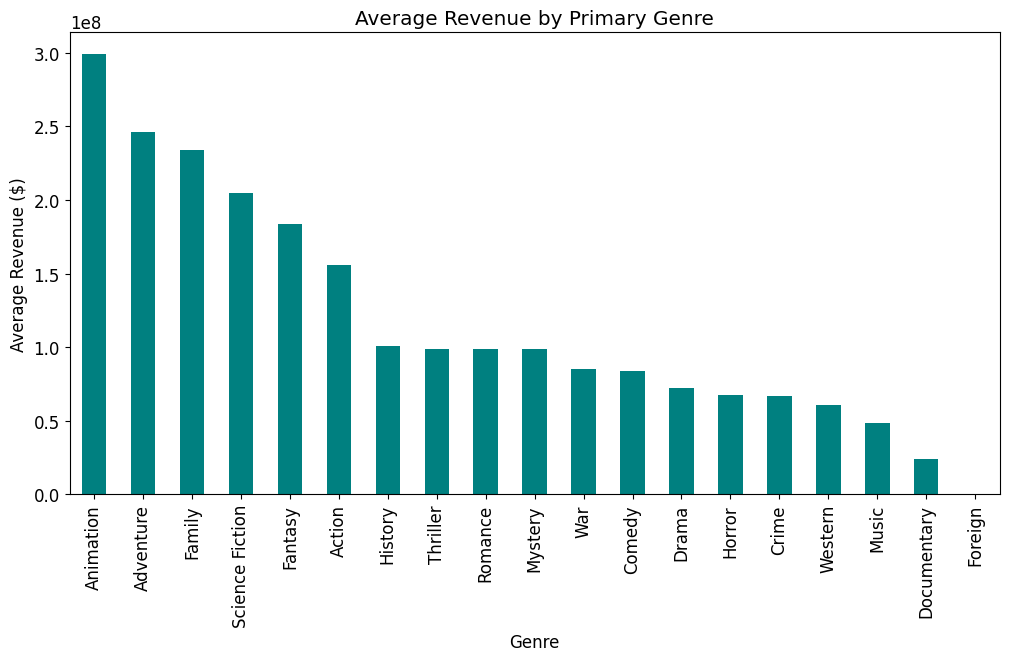

In [41]:
# Multi-variable (2D+)
plot_bar(genre_stats, 'revenue', 'Average Revenue by Primary Genre', 'Genre', 'Average Revenue ($)', color='teal')

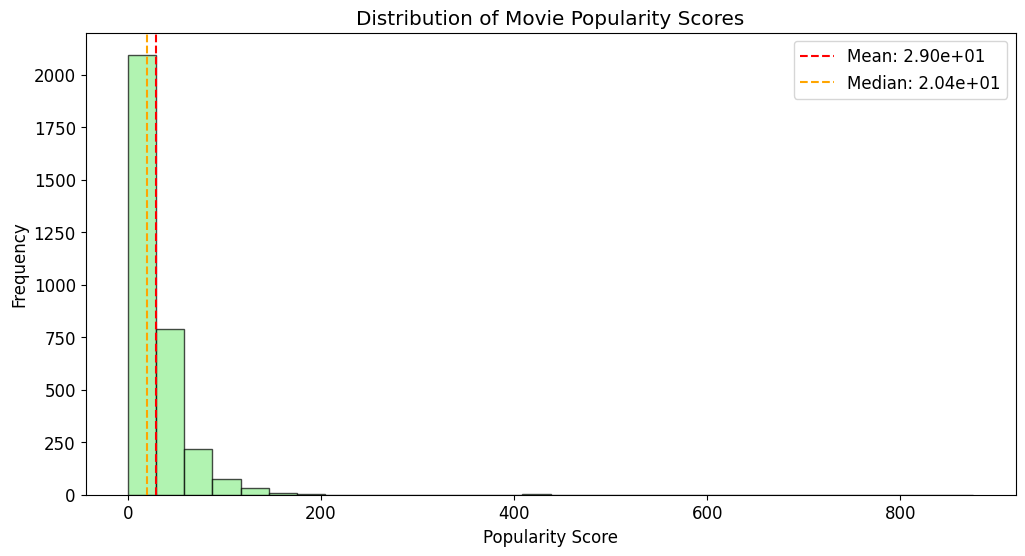

In [43]:
plot_histogram(df, 'popularity', 'Distribution of Movie Popularity Scores', 'Popularity Score', 'Frequency', color='lightgreen')

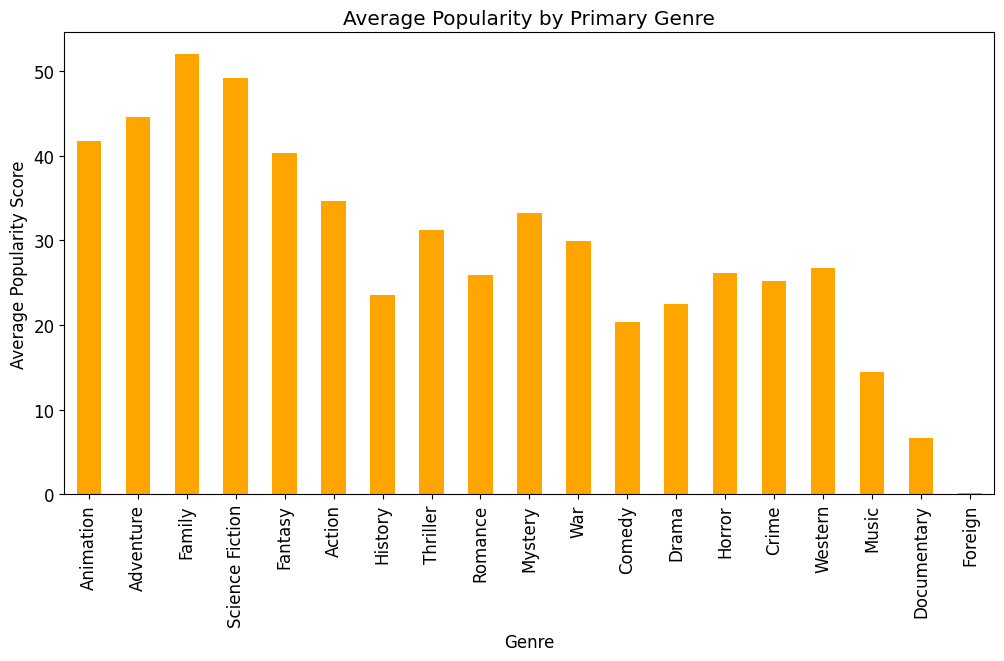

In [44]:
# Bar plot of average popularity by genre
plot_bar(genre_stats, 'popularity', 'Average Popularity by Primary Genre', 'Genre', 'Average Popularity Score', color='orange')


- **Action, Adventure, and Science Fiction** movies are the most profitable and popular.
- There is a clear trend that genres appealing to mass audiences tend to generate higher revenue and engagement.
- This suggests that **genre selection** is an important strategic factor for financial success in the film industry.


<a id='conclusions'></a>
## Conclusions

### Summary of Findings

1. **Budget vs Revenue**  
   - Movies with higher budgets generally achieve higher revenue, although some high-budget films underperform.  
   - The correlation between budget and revenue is approximately **0.70**, indicating a strong positive relationship.

2. **Genre Performance**  
   - **Action, Adventure, and Science Fiction** movies generate the highest average revenue and popularity scores.  
   - **Drama** and **Comedy** tend to have lower revenue, though they can maintain moderate popularity.

### Limitations

- This analysis is **exploratory** and only shows correlations; **causation cannot be inferred**.  
- Some data is missing or inconsistent (e.g., `homepage`, `tagline`, `runtime`), which may slightly affect accuracy.  
- Only the **primary genre** was analyzed; multi-genre effects were not considered.

### Recommendations for Future Research

- Perform **regression modeling** with multiple independent variables (budget, genre, ratings, runtime) to better predict revenue.  
- Explore **multi-genre movies** and **temporal patterns** (release year, seasonality) to gain deeper insights.  
- Consider **international markets** or additional features such as marketing spend to refine predictions.


## Submitting your Project 

In [45]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 657686 bytes to Investigate_a_Dataset.html
